In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

## 데이터 불러오기 및 파악

In [2]:
#데이터 불러오기

train = pd.read_csv("C:\\Users\\Hyelin\\bigdata\\python\\titanic\\train.csv", encoding = 'euc-kr')

In [3]:
#위의 다섯개 데이터만 불러오기

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#칼럼이 총 몇개인지 몇줄인지 파악

train.shape

(891, 12)

In [5]:
# NULL값 파악
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 데이터 기본값 파악
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 생존률 파악

survived_rate = train["Survived"].mean()

print(train["Survived"].value_counts())
print('생존률 :',round(survived_rate*100),'%')

0    549
1    342
Name: Survived, dtype: int64
생존률 : 38 %


## 데이터 전처리

In [9]:
# 이름에서 호칭 분리하기

combine = train['Name']

for dataset in combine:
    train['Title'] = train.Name.str.extract('([A-Za-z]*)\.', expand=False)



In [10]:
# 호칭별 나이대 확인

train.groupby('Title')['Age'].mean()

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [11]:
# Age 값 중 Null 값을 찾고 그중에 Title이 호칭과 같은 값을 찾은 후 age를 호칭의 평균값으로 바꾼다.
# 남은 null 값은 전체의 평균으로 대체한다.
train.loc[(train.Age.isnull())&(train.Title=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age']=22
train.loc[(train.Age.isnull()),'Age']=28

mr : 성인남성   
miss : 미혼여성   
mrs:기혼여성   
master:남자 애기들   
Dr:의사   
Rev:목사   
Col:대령   
Miie:영애, 아가씨   
Major:육군 소령   
ms:여성   
sir:경, 기사나 남작   
Lady:귀족 여성   
Dapt:육군대령, 해군대령   
the countess :백작부인   
Mme :프랑스식 mrs, 기혼여성   
Jonkheer:네덜란드의 직위없는 귀족   

In [12]:
# NULL값 파악
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


In [13]:
# age 구간 나누기
train['age_q'] = pd.qcut(train.Age, 4, labels = [1, 2, 3, 4])

In [14]:
# fare(티켓가격) 구간으로 나누기

train['Fare_q'] = pd.qcut(train.Fare, 4, labels = [1, 2, 3, 4])

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_q,Fare_q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,2


In [16]:
# Embarked Null 값 대체하기(개수가 가장 많은 S 탑승구로 대체한다.)
train.loc[(train.Embarked.isnull()),'Embarked']="S"

In [17]:
# 가족 수 구하기

train['family'] = train.SibSp + train.Parch

In [18]:
# survived  숫자형을 문자형으로 변환
train["Survived(humanized)"] = train["Survived"].replace(0, "Perish").replace(1, "Survived")

In [19]:
#NULL 값 확인

print(train.isnull().sum())

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 0
Title                    0
age_q                    0
Fare_q                   0
family                   0
Survived(humanized)      0
dtype: int64


주어진 데이터를 통해 추가로 분석 가능한 변수 생성

In [20]:
# 동행인 여부

train['Companion'] = train.family.apply(lambda x: 'Companion' if x == 0 else 'X')

In [21]:
# 결혼유무 나누기

train['Married'] = train.Title.apply(lambda x: 'X' if x == 'Miss' or x =='Master' or x == 'Rev' or x == 'Mlle' else 'O')

In [22]:
# 생성한 필드 확인용

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_q,Fare_q,family,Survived(humanized),Companion,Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,1,Perish,X,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4,4,1,Survived,X,O
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,2,0,Survived,Companion,X
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,4,1,Survived,X,O
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,2,0,Perish,Companion,O


## 분석

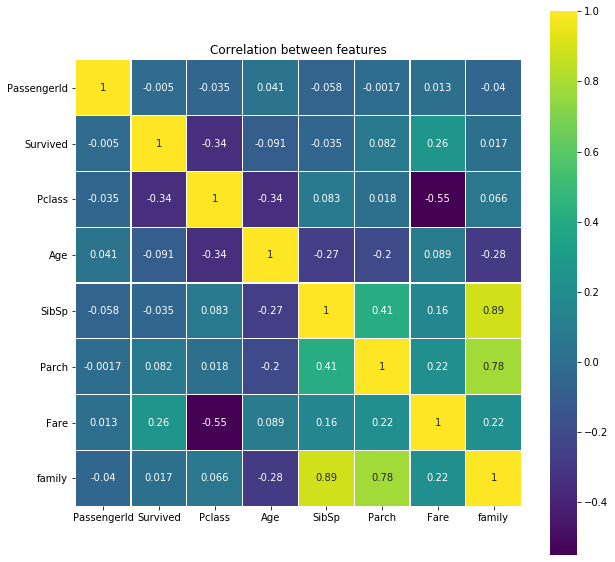

In [23]:
# 생존률과 상관도가 높은 클래스 확인

plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

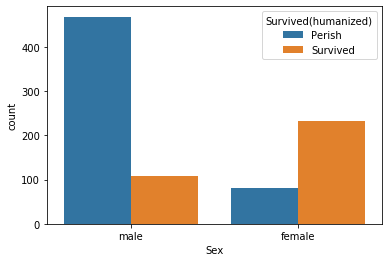

In [24]:
sns.countplot(data=train,x='Sex', hue='Survived(humanized)')
# 남성이 여성보다 많이 탑승했고 많이 죽었다.

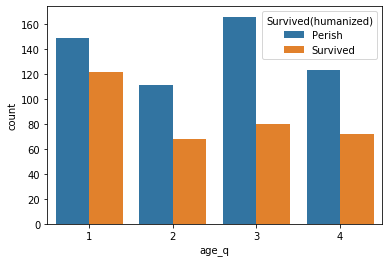

In [25]:
sns.countplot(data=train,x='age_q', hue='Survived(humanized)')
# 35~35세가 많이 죽었고, 나이가 어릴수록 생존률이 높음

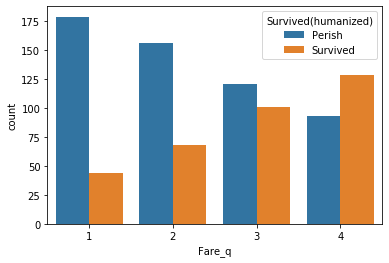

In [26]:
sns.countplot(data=train,x='Fare_q', hue='Survived(humanized)')
# 티켓 가격이 높을 수록 생존률이 높다.

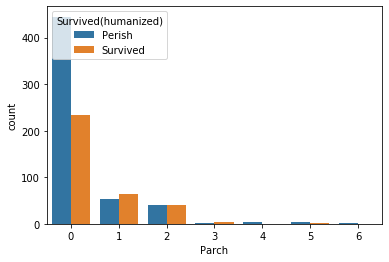

In [27]:
# 부모 자식과 생존률의 상관관계

sns.countplot(data=train,x='Parch', hue='Survived(humanized)')

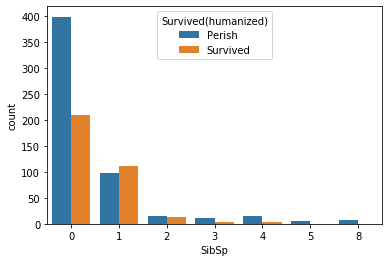

In [28]:
# 탑승자의 형제 자매 혹은 배우자의 수와 생존률의 상관관계

sns.countplot(data=train,x='SibSp', hue='Survived(humanized)')

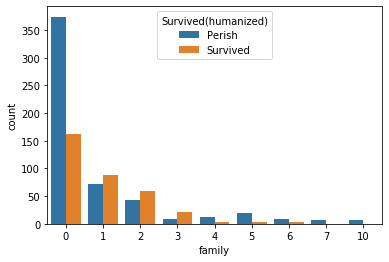

In [29]:
# 가족수와 생존률의 관계

sns.countplot(data=train,x='family', hue='Survived(humanized)')
#무의미

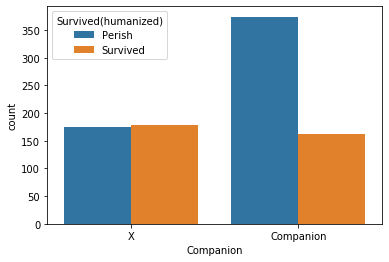

In [30]:
sns.countplot(data=train,x='Companion', hue='Survived(humanized)')
#동행인이 없는 경우의 생존률이 더 높음

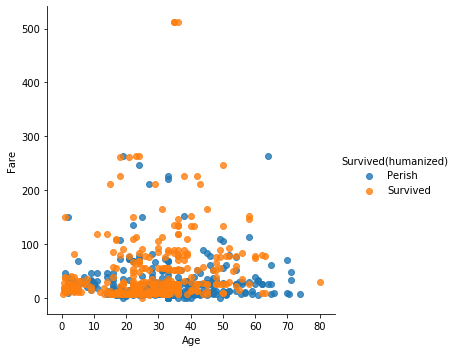

In [31]:
# 나이와 티켓가격에 따른 생존률

sns.lmplot(data=train, x="Age", y="Fare", hue="Survived(humanized)", fit_reg=False)

In [32]:
print(train["Embarked"].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


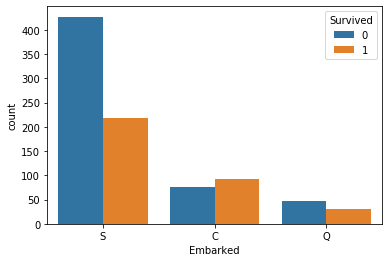

In [33]:
# 탑승구와 사망률 사이의 상관관계

sns.countplot(data=train,x='Embarked', hue='Survived')
# S에서 탑승한 승객이 사망률이 높음
 

기존의 변수 중에 유의미할것으로 예상되는 변수끼리의 조합을 추가로 분석해 본다.

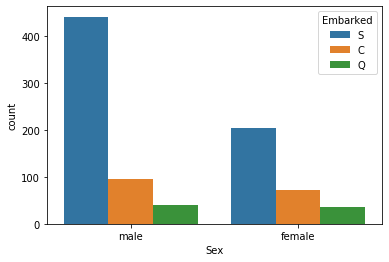

In [34]:
# 성별과 탑승구의 관계

sns.countplot(data=train,x='Sex', hue='Embarked')

# S 탑승구의 사망률이 높은 이유가 s 탑승구에서 남자가 많이 탔기 때문으로 보임

In [35]:
# 성별이랑 탑승구 병합

train['Sex_Embarked'] = train['Sex'].astype(str) + train['Embarked'].astype(str)

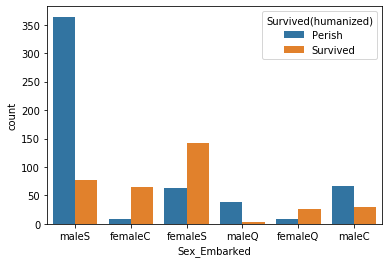

In [36]:
sns.countplot(data=train,x='Sex_Embarked', hue='Survived(humanized)')

# S클래스에서 탑승한 남성이 압도적으로 많이 사망함

In [37]:
# 성별이랑 가격 병합

train['Sex_Fare'] = train['Sex'].astype(str) + train['Fare_q'].astype(str)

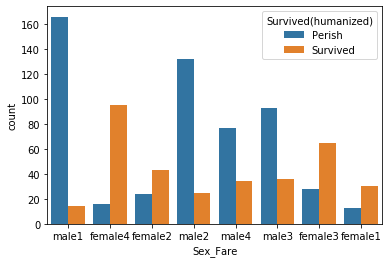

In [38]:
sns.countplot(data=train,x='Sex_Fare', hue='Survived(humanized)')

# 생존률의 가장 큰 요인은 성별이랑 가격으로 확인된다.

In [39]:
# 성별 가격별 생존률
train.pivot_table('Survived', 'Sex','Fare_q')

Fare_q,1,2,3,4
Sex,,,,
female,0.697674,0.641791,0.698925,0.855856
male,0.077778,0.159236,0.279070,0.306306


In [40]:
# 나이와 클래스 병함

train['age_Pclass'] = train['age_q'].astype(str) + train['Pclass'].astype(str)

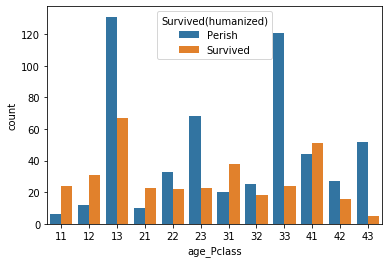

In [41]:
sns.countplot(data=train,x='age_Pclass', hue='Survived(humanized)')
# 무의미

In [42]:
# 성별과 클래스 병합

train['sex_Pclass'] = train['Sex'] + train['Pclass'].astype(str)

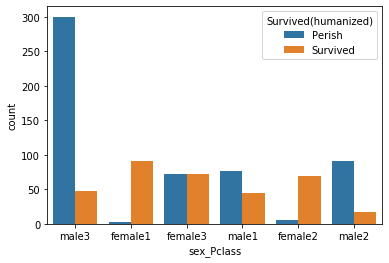

In [43]:
sns.countplot(data=train,x='sex_Pclass', hue='Survived(humanized)')
# 남성과 여성 모두 3클래스에 탑승한 인원이 많이 사망함. 가격과 비슷한 양상을 보인다.

In [44]:
# 성별과 결혼 생존률
train.pivot_table('Survived', 'Sex','Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [45]:
# 2,3클래스의 남성이 다른 요소보다 생존률이 크게 떨어지므로 변수로 따로 묶는다.

train["Pclass_male"] = train["sex_Pclass"].replace("male3", 0).replace("male2", 0).replace("male1", 1).replace("female1", 1).replace("female2", 1).replace("female3", 1)

In [46]:
# 결혼 여부 분석
train["Married"].value_counts()

O    661
X    230
Name: Married, dtype: int64

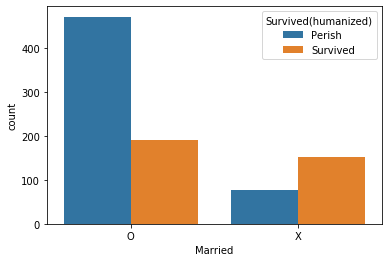

In [47]:
# 결혼과 생존의 상관관계
sns.countplot(data=train,x='Married', hue='Survived(humanized)')

In [48]:
# 성별과 결혼 생존률
train.pivot_table('Survived', 'Sex','Married')

Married,O,X
Sex,,
female,0.800000,0.701087
male,0.161959,0.500000


In [49]:
train['sex_Married'] = train['Sex'] + train['Married'].astype(str)

In [50]:
train["Married_man"] = train["sex_Married"].replace("maleO", 0).replace("femaleO", 1).replace("maleX", 1).replace("femaleX", 1)

 분석 결과 생존률과 가장 관련있다고 생각되는 Sex, Fare, Embarked, Class 를 이용하여 분석을 시도한다.   
 추가로 결혼한 남성의 생존률이 낮은것으로 분석되었고, 가격 중에서도 가장 낮은 등급의 가격대와 가장 높은 가격대의 남성의 경우에는 생존률이 높았다, 또 3,2클래스의 남성이 생존률이 매우 낮았기 때문에 추가로 분석한다.

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Survived(humanized),Companion,Married,Sex_Embarked,Sex_Fare,age_Pclass,sex_Pclass,Pclass_male,sex_Married,Married_man
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Perish,X,O,maleS,male1,13,male3,0,maleO,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Survived,X,O,femaleC,female4,41,female1,1,femaleO,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Survived,Companion,X,femaleS,female2,23,female3,1,femaleX,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Survived,X,O,femaleS,female4,31,female1,1,femaleO,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Perish,Companion,O,maleS,male2,33,male3,0,maleO,0


### 데이터 정리

In [52]:
# 필요없는 데이터 삭제

train = train.drop(['Cabin'],axis=1)
train = train.drop(['family'],axis=1)
train = train.drop(['Companion'],axis=1)
train = train.drop(['age_Pclass'],axis=1)
train = train.drop(['sex_Pclass'],axis=1)
train = train.drop(['Sex_Fare'],axis=1)
train = train.drop(['Sex_Embarked'],axis=1)

In [53]:
train = train.drop(['Survived(humanized)'],axis=1)
train = train.drop(['Parch'],axis=1)
train = train.drop(['Ticket'],axis=1)
train = train.drop(['Name'],axis=1)
train = train.drop(['Age'],axis=1)
train = train.drop(['SibSp'],axis=1)

In [54]:
# 성별데이터를 처리하기 편하게 하기 위해 숫자데이터로 변경

sex_mapping = {'male' : 0, 'female' : 1}
train['Sex'] = train['Sex'].map(sex_mapping)


In [55]:
# s에서 탑승한 인원의 생존률이 현저하게 떨어졌기 때문에 s에서 탑승한 인원과 아닌 인원을 나누어 분석한다.

train["Embarked_S"] = train["Embarked"].replace("S", 1).replace("C", 0).replace("Q", 0)

In [56]:
# 결혼 데이터 숫자로 변경
train["Married"] = train["Married"].replace("O", 1).replace("X", 0)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Title,age_q,Fare_q,Married,Pclass_male,sex_Married,Married_man,Embarked_S
0,1,0,3,0,7.2500,S,Mr,1,1,1,0,maleO,0,1
1,2,1,1,1,71.2833,C,Mrs,4,4,1,1,femaleO,1,0
2,3,1,3,1,7.9250,S,Miss,2,2,0,1,femaleX,1,1
3,4,1,1,1,53.1000,S,Mrs,3,4,1,1,femaleO,1,1
4,5,0,3,0,8.0500,S,Mr,3,2,1,0,maleO,0,1


## TEST 전처리

In [143]:
test =  pd.read_csv("C:\\Users\\Hyelin\\bigdata\\python\\titanic\\test.csv", encoding = 'euc-kr')

In [144]:
# Null 값 확인
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [145]:
combine = test['Name']

for dataset in combine:
    test['Title'] = test.Name.str.extract('([A-Za-z]*)\.', expand=False)

In [146]:
# test 데이터에 age null 값 처리
test.loc[(test.Age.isnull())&(test.Title=='Mr'),'Age']=33
test.loc[(test.Age.isnull())&(test.Title=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Title=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Title=='Miss'),'Age']=22
test.loc[(test.Age.isnull()),'Age']=28

In [147]:
#Null값 처리

test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"), inplace = True)

In [148]:
# 결혼유무 나누기

test['Married'] = test.Title.apply(lambda x: 'X' if x == 'Miss' or x =='Master' or x == 'Rev' or x == 'Mlle' else 'O')

In [149]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Married
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,O
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,O
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,O
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,O
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,O


In [150]:
# 클래스 만들기

test['Fare_q'] = pd.qcut(test.Fare, 4, labels = [1, 2, 3, 4])
test['age_q'] = pd.qcut(test.Age, 4, labels = [1, 2, 3, 4])

In [151]:
#  2,3 클래스 남성에 대한 변수 생성
test['sex_Pclass'] = test['Sex'] + test['Pclass'].astype(str)

test["Pclass_male"] = test["sex_Pclass"].replace("male3", 0).replace("male2", 0).replace("male1", 1).replace("female1", 1).replace("female2", 1).replace("female3", 1)

In [152]:
# 기혼 남성 변수 생성
test['sex_Married'] = test['Sex'] + test['Married'].astype(str)

test["Married_man"] = test["sex_Married"].replace("maleO", 0).replace("femaleO", 1).replace("maleX", 1).replace("femaleX", 1)

In [153]:
# 성별데이터를 처리하기 편하게 하기 위해 숫자데이터로 변경

sex_mapping = {'male' : 0, 'female' : 1}
test['Sex'] = test['Sex'].map(sex_mapping)

In [154]:
# 결혼 데이터 숫자로 변경
test["Married"] = test["Married"].replace("O", 1).replace("X", 0)

In [155]:
#탑승구 나누기

test["Embarked_S"] = test["Embarked"].replace("S", 1).replace("C", 0).replace("Q", 0)

In [156]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Married          0
Fare_q           0
age_q            0
sex_Pclass       0
Pclass_male      0
sex_Married      0
Married_man      0
Embarked_S       0
dtype: int64


In [157]:
# 필요없는 컬럼 삭제

test = test.drop(['Parch'],axis=1)
test = test.drop(['Name'],axis=1)
test = test.drop(['SibSp'],axis=1)
test = test.drop(['Age'],axis=1)
test = test.drop(['Ticket'],axis=1)
test = test.drop(['Fare'],axis=1)
test = test.drop(['Cabin'],axis=1)
test = test.drop(['Embarked'],axis=1)
test = test.drop(['Title'],axis=1)
test = test.drop(['sex_Married'],axis=1)
test = test.drop(['sex_Pclass'],axis=1)

In [158]:
test.head()

,PassengerId,Pclass,Sex,Married,Fare_q,age_q,Pclass_male,Married_man,Embarked_S
0,892,3,0,1,1,3,0,0,0
1,893,3,1,1,1,4,1,1,1
2,894,2,0,1,2,4,0,0,0
3,895,3,0,1,2,2,0,0,1
4,896,3,1,1,2,1,1,1,1


# 의사결정나무 1

In [177]:
# Feature 선택
feature_name = ['Sex','Fare_q','Pclass','Embarked_S', "Pclass_male"]

Tree_train = train[feature_name]

Tree_train.head()

,Sex,Fare_q,age_q,Pclass,Embarked_S,Pclass_male
0,0,1,1,3,1,0
1,1,4,4,1,0,1
2,1,2,2,3,1,1
3,1,4,3,1,1,1
4,0,2,3,3,1,0


In [178]:
# 정답 셋 준비!

S_name = 'Survived'

S_train = train[S_name]

S_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [179]:
# 트리만들기

seed = 37
model = DecisionTreeClassifier(max_depth=5,
                               random_state=seed)
model.fit(Tree_train, S_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=37, splitter='best')

In [180]:
# 트리 출력

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_name,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

In [181]:
X_test = test[feature_name]
prediction = model.predict(X_test)

test["Survived"] = prediction
print(test.shape)
test.head()

(418, 10)


,PassengerId,Pclass,Sex,Married,Fare_q,age_q,Pclass_male,Married_man,Embarked_S,Survived
0,892,3,0,1,1,3,0,0,0,0
1,893,3,1,1,1,4,1,1,1,0
2,894,2,0,1,2,4,0,0,0,0
3,895,3,0,1,2,2,0,0,1,0
4,896,3,1,1,2,1,1,1,1,0


In [182]:
df = test.loc[:,["PassengerId","Survived"]]
df.to_csv("../titanic/submit.csv", index = False)

### ==> 0.77751